In [1]:
##=========================##
##   All imports go here   ##
##=========================##

##  Import entire python stdlib packages
import logging, os, sys

##  Import entire pypi packages
import tensorflow as tf
import numpy      as np

##  Remove tensorflow INFO messages
tf.get_logger().setLevel('WARNING')

##  Add directory above this to system path to expose mathsformer package location
sys.path.append("/".join(os.getcwd().split("/")[:-1]))

##  Import individual modules/objects from packages
from matplotlib  import patches, pyplot as plt
from mathsformer import config, data, transformers, utils
from mathsformer import selfsupervised_learning_addition_model_backend as backend


In [2]:
##==============================##
##   Set custom config values   ##
##==============================##

custom_config = {
    "global" : {
        "model_tag"        : "baseline",
        "base_seed"        : -1,
        "working_dir"      : "evaluate_model_[date]",
        "log_lvl_iostream" : logging.INFO,
        "log_lvl_fstream"  : logging.DEBUG,
    },
    "data" : {
        "train_data" : {
            "int_lengths"      : [1, 2, 3, 4],
            "num_ints"         : [1, 2, 4, 5],
        },
        "test_data" : {
            "int_lengths"      : [1, 2, 3, 4, 5],
            "num_ints"         : [1, 2, 3, 4, 5, 6, 7, 8],
            "batch_size"       : 32,
            "num_batches"      : 10,
            "gen_base_seed"    : 200,
            "gen_reproducible" : True,
        },
        "characters"              : ['M', 'B', 'E', 'N', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-'],
        "mask_char"               : 'M',
        "seq_start_char"          : 'B',
        "seq_end_char"            : 'E',
        "negative_char"           : 'N',
        "dtype"                   : "int32",
    },
    "models" : {
        "baseline"   : "save/SSL_loopy_enc_dec_notebook_int1234_num1245_embed128_enc_10blocks_1loops_width512_dec_2blocks_1loops_width512_post3_width512_idemm1_2023_06_26/final_model.keras",
        "loop_idem0" : "save/SSL_loopy_enc_dec_notebook_int1234_num1245_embed128_enc_2blocks_5loops_width512_dec_2blocks_1loops_width512_post3_width512_idemm1_2023_06_25_v2/final_model.keras",
        "base_idem1" : "save/SSL_loopy_enc_dec_notebook_int1234_num1245_embed128_enc_10blocks_1loops_width512_dec_2blocks_1loops_width512_post3_width512_idem1_2023_06_27_v2/model_checkpoint_epoch3_val_loss_0.077007.keras",
        "loop_idem2" : "SSL_loopy_enc_dec_notebook_int1234_num1245_embed128_enc_2blocks_5loops_width512_dec_2blocks_1loops_width512_post3_width512_idem2_2023_06_27/model_checkpoint_epoch72_val_loss_0.027003.keras"
    },
    "evaluate" : {
        "num_print" : 50,
    },
}


In [3]:
##===================================##
##   Load and validate full config   ##
##===================================##

##  Create config object containing default values
cfg = config.Config(backend.DEFAULT_CONFIG)

##  Override with custom values
cfg.load_dict(custom_config)

##  Validate config
backend.validate_config(cfg)

##  Print success
print(utils.fancy_message(f"Config created"))

##  For convenience, split configs for different sections
cfg_global   = cfg["global"  ]
cfg_data     = cfg["data"    ]
cfg_model    = cfg["models"  ]
cfg_training = cfg["training"]
cfg_evaluate = cfg["evaluate"]


===   Config created   ===


In [4]:
##==============================##
##   Create working directory   ##
##==============================##

##  Report success
working_dir, logger, base_seed, np_seed, tf_seed = utils.initialise_program(
    "evaluate_model (notebook)", 
    working_dir       = cfg_global["working_dir"], 
    cfg               = cfg,
    base_seed         = cfg_global["base_seed"],
    log_lvl_iostream  = cfg_global["log_lvl_iostream"],
    log_lvl_fstream   = cfg_global["log_lvl_fstream" ],
)


===   Working directory created at evaluate_model_2023_06_28_v6   ===
   INFO initialise_logging: Begin logging on 2023-06-28 at 12:17:21
   INFO initialise_program: Program description: evaluate_model (notebook)
   INFO initialise_program: Working directory: evaluate_model_2023_06_28_v6
   INFO log_versions: ------------------------------------------------------+------------------------------------------------------
   INFO log_versions:                                              PACKAGE  |  VERSION
   INFO log_versions: ------------------------------------------------------+------------------------------------------------------
   INFO log_versions:                                               Python  |  3.11.3 (main, May 15 2023, 18:01:31) [Clang 14.0.6 ]
   INFO log_versions:                                              IPython  |  8.14.0
   INFO log_versions:                                 IPython.core.release  |  8.14.0
   INFO log_versions:                                   

   INFO log_versions:                                             pygments  |  2.15.1
   INFO log_versions:                                            pyparsing  |  3.1.0
   INFO log_versions:                                                   re  |  2.2.1
   INFO log_versions:                                             requests  |  2.31.0
   INFO log_versions:                                 requests.__version__  |  2.31.0
   INFO log_versions:                                                 idna  |  3.4
   INFO log_versions:                                        idna.idnadata  |  15.0.0
   INFO log_versions:                                    idna.package_data  |  3.4
   INFO log_versions:                                              urllib3  |  1.26.16
   INFO log_versions:                                     urllib3._version  |  1.26.16
   INFO log_versions:                                   urllib3.connection  |  1.26.16
   INFO log_versions:                                 urlli

   INFO initialise_program: Registered config value data > characters: ['M', 'B', 'E', 'N', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-']
   INFO initialise_program: Registered config value data > mask_char: M
   INFO initialise_program: Registered config value data > seq_start_char: B
   INFO initialise_program: Registered config value data > seq_end_char: E
   INFO initialise_program: Registered config value data > negative_char: N
   INFO initialise_program: Registered config value data > dtype: int32
   INFO initialise_program: Registered config value model > load_pretrained_model: None
   INFO initialise_program: Registered config value model > name: mathsformer_LLM
   INFO initialise_program: Registered config value model > dtype: float32
   INFO initialise_program: Registered config value model > dropout: 0.1
   INFO initialise_program: Registered config value model > learning_rate: 0.001
   INFO initialise_program: Registered config value model > jit_compile: Fals

In [5]:
##======================##
##   Create model   ##
##======================##

model_tag   = cfg_global["model_tag"]
model_fname = cfg_model[model_tag]

model = backend.load_text_to_text_model(model_fname)


In [6]:
##======================##
##   Create tokeniser   ##
##======================##

token_transform = data.TokenTransform.from_dictionary(cfg_data)
token_transform.summary(print_fn=logger.info)


   INFO summary: TokenTransform of dtype int32 with 16 characters: ['M', 'B', 'E', 'N', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-']


INFO:mathsformer:TokenTransform of dtype int32 with 16 characters: ['M', 'B', 'E', 'N', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-']


   INFO summary: Special characters are seq_start_char (B), seq_end_char (E), mask_char (M)


INFO:mathsformer:Special characters are seq_start_char (B), seq_end_char (E), mask_char (M)


   INFO summary: Tokeniser dictionary is {'M': 0, 'B': 1, 'E': 2, 'N': 3, '0': 4, '1': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13, '+': 14, '-': 15}


INFO:mathsformer:Tokeniser dictionary is {'M': 0, 'B': 1, 'E': 2, 'N': 3, '0': 4, '1': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13, '+': 14, '-': 15}


   INFO summary: Detokeniser dictionary is {0: 'M', 1: 'B', 2: 'E', 3: 'N', 4: '0', 5: '1', 6: '2', 7: '3', 8: '4', 9: '5', 10: '6', 11: '7', 12: '8', 13: '9', 14: '+', 15: '-'}


INFO:mathsformer:Detokeniser dictionary is {0: 'M', 1: 'B', 2: 'E', 3: 'N', 4: '0', 5: '1', 6: '2', 7: '3', 8: '4', 9: '5', 10: '6', 11: '7', 12: '8', 13: '9', 14: '+', 15: '-'}


In [7]:
##============================================================##
##   Define method for retrieving token accuracy from model   ##
##============================================================##

def get_token_accuracy(model, token_transform, N, L, verbose=0) :
    data_gen = data.RandomDataGenerator_Addition(
                                        token_transform = token_transform, 
                                        int_lengths     = [L],
                                        num_ints        = [N],
                                        batch_size      = cfg_data["test_data"]["batch_size"],
                                        num_batches     = cfg_data["test_data"]["num_batches"],
                                        base_seed       = cfg_data["test_data"]["gen_base_seed"],
                                        reproducible    = cfg_data["test_data"]["gen_reproducible"],
                                        negative_char   = cfg_data["negative_char"],
    )
    
    evals = model.evaluate(data_gen, verbose=verbose)
    if "masked_categorical_accuracy" in model.metrics_names :
        metric_idx = model.metrics_names.index("masked_categorical_accuracy")
    else : 
        metric_idx = model.metrics_names.index("mathsformer_LLM_output_masked_categorical_accuracy")
    return evals[metric_idx]
    

In [8]:
##=============================================================##
##   Define method for retrieving answer accuracy from model   ##
##=============================================================##

def get_answer_accuracy(model, token_transform, N, L, verbose=0) :
    data_gen = data.RandomDataGenerator_Addition(
                                        token_transform = token_transform, 
                                        int_lengths     = [L],
                                        num_ints        = [N],
                                        batch_size      = cfg_data["test_data"]["batch_size"],
                                        num_batches     = cfg_data["test_data"]["num_batches"],
                                        base_seed       = cfg_data["test_data"]["gen_base_seed"],
                                        reproducible    = cfg_data["test_data"]["gen_reproducible"],
                                        negative_char   = cfg_data["negative_char"],
    )
    
    Nt, Nf = 0, 0
    for X, Y_true in data_gen :
        Y_true = Y_true.numpy()
        Y_pred = model.predict(X, verbose=0)
        if type(Y_pred) is list :
            Y_pred = Y_pred[0]
        Y_pred = np.argmax(Y_pred, axis=-1)
        for y_true, y_pred in zip(Y_true, Y_pred) :
            y_true, y_pred = y_true[y_true != 0], y_pred[y_true != 0]
            if (y_true == y_pred).all() : Nt += 1
            else : Nf += 1
                            
    acc = Nt / (Nt + Nf)
    return acc


In [9]:
##======================================================##
##   Define method for creating answer accuracy table   ##
##======================================================##

def get_answer_accuracy_table(model, token_transform, num_ints, int_lengths, verbose=0, log=True) :
    result_accs = []
    for N in num_ints :
        result_accs.append([])
        for L in int_lengths :
            result_acc  = get_answer_accuracy(model, token_transform, N, L)
            result_accs[-1].append(result_acc)
            if log :
                logger.info(f"N={N}, L={L} with result accuracy {100.*result_acc:.2f}%")
    return np.array(result_accs)


In [10]:
##==================================##
##   Create answer accuracy table   ##
##==================================##

num_ints    = np.array(cfg_data["test_data"]["num_ints"])
int_lengths = np.array(cfg_data["test_data"]["int_lengths"])

result_accs = get_answer_accuracy_table(model, token_transform, num_ints, int_lengths)


2023-06-28 12:17:23.811640: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


   INFO get_answer_accuracy_table: N=1, L=1 with result accuracy 100.00%


INFO:mathsformer:N=1, L=1 with result accuracy 100.00%


   INFO get_answer_accuracy_table: N=1, L=2 with result accuracy 100.00%


INFO:mathsformer:N=1, L=2 with result accuracy 100.00%


   INFO get_answer_accuracy_table: N=1, L=3 with result accuracy 100.00%


INFO:mathsformer:N=1, L=3 with result accuracy 100.00%


   INFO get_answer_accuracy_table: N=1, L=4 with result accuracy 100.00%


INFO:mathsformer:N=1, L=4 with result accuracy 100.00%


   INFO get_answer_accuracy_table: N=1, L=5 with result accuracy 0.00%


INFO:mathsformer:N=1, L=5 with result accuracy 0.00%


   INFO get_answer_accuracy_table: N=2, L=1 with result accuracy 100.00%


INFO:mathsformer:N=2, L=1 with result accuracy 100.00%


   INFO get_answer_accuracy_table: N=2, L=2 with result accuracy 100.00%


INFO:mathsformer:N=2, L=2 with result accuracy 100.00%


   INFO get_answer_accuracy_table: N=2, L=3 with result accuracy 99.69%


INFO:mathsformer:N=2, L=3 with result accuracy 99.69%


   INFO get_answer_accuracy_table: N=2, L=4 with result accuracy 99.38%


INFO:mathsformer:N=2, L=4 with result accuracy 99.38%


   INFO get_answer_accuracy_table: N=2, L=5 with result accuracy 0.94%


INFO:mathsformer:N=2, L=5 with result accuracy 0.94%


   INFO get_answer_accuracy_table: N=3, L=1 with result accuracy 100.00%


INFO:mathsformer:N=3, L=1 with result accuracy 100.00%


   INFO get_answer_accuracy_table: N=3, L=2 with result accuracy 100.00%


INFO:mathsformer:N=3, L=2 with result accuracy 100.00%


   INFO get_answer_accuracy_table: N=3, L=3 with result accuracy 99.38%


INFO:mathsformer:N=3, L=3 with result accuracy 99.38%


   INFO get_answer_accuracy_table: N=3, L=4 with result accuracy 99.38%


INFO:mathsformer:N=3, L=4 with result accuracy 99.38%


   INFO get_answer_accuracy_table: N=3, L=5 with result accuracy 0.00%


INFO:mathsformer:N=3, L=5 with result accuracy 0.00%


   INFO get_answer_accuracy_table: N=4, L=1 with result accuracy 99.69%


INFO:mathsformer:N=4, L=1 with result accuracy 99.69%


   INFO get_answer_accuracy_table: N=4, L=2 with result accuracy 98.75%


INFO:mathsformer:N=4, L=2 with result accuracy 98.75%


   INFO get_answer_accuracy_table: N=4, L=3 with result accuracy 99.06%


INFO:mathsformer:N=4, L=3 with result accuracy 99.06%


   INFO get_answer_accuracy_table: N=4, L=4 with result accuracy 95.94%


INFO:mathsformer:N=4, L=4 with result accuracy 95.94%


   INFO get_answer_accuracy_table: N=4, L=5 with result accuracy 0.00%


INFO:mathsformer:N=4, L=5 with result accuracy 0.00%


   INFO get_answer_accuracy_table: N=5, L=1 with result accuracy 99.06%


INFO:mathsformer:N=5, L=1 with result accuracy 99.06%


   INFO get_answer_accuracy_table: N=5, L=2 with result accuracy 98.12%


INFO:mathsformer:N=5, L=2 with result accuracy 98.12%


   INFO get_answer_accuracy_table: N=5, L=3 with result accuracy 93.44%


INFO:mathsformer:N=5, L=3 with result accuracy 93.44%


   INFO get_answer_accuracy_table: N=5, L=4 with result accuracy 86.25%


INFO:mathsformer:N=5, L=4 with result accuracy 86.25%


   INFO get_answer_accuracy_table: N=5, L=5 with result accuracy 0.00%


INFO:mathsformer:N=5, L=5 with result accuracy 0.00%


   INFO get_answer_accuracy_table: N=6, L=1 with result accuracy 51.25%


INFO:mathsformer:N=6, L=1 with result accuracy 51.25%


   INFO get_answer_accuracy_table: N=6, L=2 with result accuracy 31.25%


INFO:mathsformer:N=6, L=2 with result accuracy 31.25%


   INFO get_answer_accuracy_table: N=6, L=3 with result accuracy 20.00%


INFO:mathsformer:N=6, L=3 with result accuracy 20.00%


   INFO get_answer_accuracy_table: N=6, L=4 with result accuracy 0.94%


INFO:mathsformer:N=6, L=4 with result accuracy 0.94%


   INFO get_answer_accuracy_table: N=6, L=5 with result accuracy 0.00%


INFO:mathsformer:N=6, L=5 with result accuracy 0.00%


   INFO get_answer_accuracy_table: N=7, L=1 with result accuracy 6.25%


INFO:mathsformer:N=7, L=1 with result accuracy 6.25%


   INFO get_answer_accuracy_table: N=7, L=2 with result accuracy 0.62%


INFO:mathsformer:N=7, L=2 with result accuracy 0.62%


   INFO get_answer_accuracy_table: N=7, L=3 with result accuracy 0.00%


INFO:mathsformer:N=7, L=3 with result accuracy 0.00%


   INFO get_answer_accuracy_table: N=7, L=4 with result accuracy 0.00%


INFO:mathsformer:N=7, L=4 with result accuracy 0.00%


   INFO get_answer_accuracy_table: N=7, L=5 with result accuracy 0.00%


INFO:mathsformer:N=7, L=5 with result accuracy 0.00%


   INFO get_answer_accuracy_table: N=8, L=1 with result accuracy 9.69%


INFO:mathsformer:N=8, L=1 with result accuracy 9.69%


   INFO get_answer_accuracy_table: N=8, L=2 with result accuracy 1.56%


INFO:mathsformer:N=8, L=2 with result accuracy 1.56%


   INFO get_answer_accuracy_table: N=8, L=3 with result accuracy 0.00%


INFO:mathsformer:N=8, L=3 with result accuracy 0.00%


   INFO get_answer_accuracy_table: N=8, L=4 with result accuracy 0.00%


INFO:mathsformer:N=8, L=4 with result accuracy 0.00%


   INFO get_answer_accuracy_table: N=8, L=5 with result accuracy 0.00%


INFO:mathsformer:N=8, L=5 with result accuracy 0.00%


In [11]:
##=====================================##
##   Define method for creating plot   ##
##=====================================##

def make_plot(X, Y, Z, epoch_num=-1, model_tag="unknown", savefig=None, show=True, close=True, dpi=150) :
    
    fig = plt.figure(figsize=(0.55*len(X), 0.55*len(Y)))
    ax  = fig.add_axes([0, 0, 1, 1])
    ax.tick_params(axis="both", which="both", direction="in", right=True, top=True, labelsize=12)

    ax.set_xticks(X-1)
    ax.xaxis.set_ticklabels(X)

    ax.set_yticks(Y-1)
    ax.yaxis.set_ticklabels(Y)

    ax.set_xlabel("Num. integers.", va="top", labelpad=20, fontsize=14)
    ax.set_ylabel("Integer\nlength", va="bottom", ha="right", rotation=0, labelpad=20, fontsize=14)

    cbar = ax.imshow(Z, cmap="Blues", vmin=0, vmax=1)

    cax = fig.add_axes([1.06, 0, 0.05, 1])
    cax.tick_params(axis="both", which="both", direction="in", right=True, top=True, labelsize=12)
    plt.colorbar(cbar, cax=cax)

    cax.set_ylabel("Accuracy\nper-answer", ha="left", va="bottom", labelpad=15, rotation=0, fontsize=14)

    if epoch_num >= 0 :
        ax.text(0, 1.19, f"Epoch {epoch_num}", ha="left", va="bottom", fontsize=8, transform=ax.transAxes,
               bbox={"fc":"palegreen", "ec":"darkgreen", "lw":0.6})
    
    ax.text(0, 1.05, f"Model tag: {model_tag}", ha="left", va="bottom", style="italic", fontsize=10,
           transform=ax.transAxes)

    first_patch = True
    for L in cfg_data["train_data"].get("int_lengths", []) :
        for N in cfg_data["train_data"].get("num_ints", []) :
            rect = patches.Rectangle((N-1.475, L-1.475), 0.95, 0.95, lw=1.5, ls="-", ec="r", fc='none', alpha=1,
                                    label="= inside training region" if first_patch else "")
            ax.add_patch(rect)            
            first_patch = False

    ax.legend(loc=(0.57, 1.03), frameon=False, fontsize=10, handlelength=1, handletextpad=0.4)

    if savefig is not None :
        fig.savefig(savefig, bbox_inches="tight", dpi=dpi)

    if show :
        plt.show(fig)

    if close :
        plt.close(fig)
        

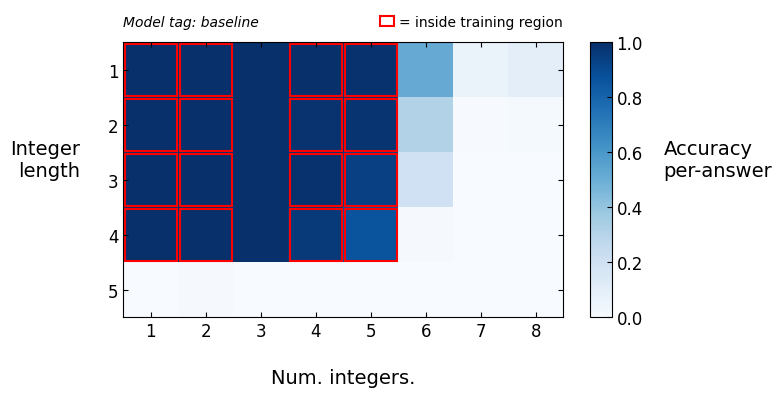

In [12]:
##===============##
##   Make plot   ##
##===============##


figs_dir = f"figures/evaluate_model"
if not os.path.exists(figs_dir) :
    os.mkdir(figs_dir)

make_plot(num_ints, 
          int_lengths, 
          np.transpose(result_accs), 
          model_tag = model_tag, 
          savefig   = f"{figs_dir}/evaluate_model_{model_tag}.pdf"
)


In [13]:
##==========================##
##   Inspect table values   ##
##==========================##

def print_accuracy_table(num_ints, int_lengths, result_accs, print_fn=None) :
    """
    """
    
    ##  Resolve print_fn argument
    if print_fn is None :
        print_fn = print
        
    ##  Print table
    print_fn("+--------+-" + "---".join(["-----" for N in num_ints]))
    print_fn("|  Acc   |" + "       "*int(len(num_ints)/2) + "N")
    print_fn("|  [%]   | " + " | ".join([f"{N}".ljust(5) for N in num_ints]))
    print_fn("+--------+-" + "-+-".join(["-----" for N in num_ints]))
    for y, L in enumerate(int_lengths) :
        print_fn(f"|     {L} | ".rjust(9) + " | ".join([f"{100.*result_accs[x][y]:.1f}".ljust(5) for x in range(len(num_ints))]))
        print_fn(f"| {'L' if y == 0 else ' '}  ----+-" + "-+-".join(["-----" for N in num_ints]))
    
    
logger.info("Per-answer accuracies are:")
print_accuracy_table(num_ints, int_lengths, result_accs, print_fn=logger.info)


   INFO <module>: Per-answer accuracies are:


INFO:mathsformer:Per-answer accuracies are:


   INFO print_accuracy_table: +--------+--------------------------------------------------------------


INFO:mathsformer:+--------+--------------------------------------------------------------


   INFO print_accuracy_table: |  Acc   |                            N


INFO:mathsformer:|  Acc   |                            N


   INFO print_accuracy_table: |  [%]   | 1     | 2     | 3     | 4     | 5     | 6     | 7     | 8    


INFO:mathsformer:|  [%]   | 1     | 2     | 3     | 4     | 5     | 6     | 7     | 8    


   INFO print_accuracy_table: +--------+-------+-------+-------+-------+-------+-------+-------+------


INFO:mathsformer:+--------+-------+-------+-------+-------+-------+-------+-------+------


   INFO print_accuracy_table: |     1 | 100.0 | 100.0 | 100.0 | 99.7  | 99.1  | 51.2  | 6.2   | 9.7  


INFO:mathsformer:|     1 | 100.0 | 100.0 | 100.0 | 99.7  | 99.1  | 51.2  | 6.2   | 9.7  


   INFO print_accuracy_table: | L  ----+-------+-------+-------+-------+-------+-------+-------+------


INFO:mathsformer:| L  ----+-------+-------+-------+-------+-------+-------+-------+------


   INFO print_accuracy_table: |     2 | 100.0 | 100.0 | 100.0 | 98.8  | 98.1  | 31.2  | 0.6   | 1.6  


INFO:mathsformer:|     2 | 100.0 | 100.0 | 100.0 | 98.8  | 98.1  | 31.2  | 0.6   | 1.6  


   INFO print_accuracy_table: |    ----+-------+-------+-------+-------+-------+-------+-------+------


INFO:mathsformer:|    ----+-------+-------+-------+-------+-------+-------+-------+------


   INFO print_accuracy_table: |     3 | 100.0 | 99.7  | 99.4  | 99.1  | 93.4  | 20.0  | 0.0   | 0.0  


INFO:mathsformer:|     3 | 100.0 | 99.7  | 99.4  | 99.1  | 93.4  | 20.0  | 0.0   | 0.0  


   INFO print_accuracy_table: |    ----+-------+-------+-------+-------+-------+-------+-------+------


INFO:mathsformer:|    ----+-------+-------+-------+-------+-------+-------+-------+------


   INFO print_accuracy_table: |     4 | 100.0 | 99.4  | 99.4  | 95.9  | 86.2  | 0.9   | 0.0   | 0.0  


INFO:mathsformer:|     4 | 100.0 | 99.4  | 99.4  | 95.9  | 86.2  | 0.9   | 0.0   | 0.0  


   INFO print_accuracy_table: |    ----+-------+-------+-------+-------+-------+-------+-------+------


INFO:mathsformer:|    ----+-------+-------+-------+-------+-------+-------+-------+------


   INFO print_accuracy_table: |     5 | 0.0   | 0.9   | 0.0   | 0.0   | 0.0   | 0.0   | 0.0   | 0.0  


INFO:mathsformer:|     5 | 0.0   | 0.9   | 0.0   | 0.0   | 0.0   | 0.0   | 0.0   | 0.0  


   INFO print_accuracy_table: |    ----+-------+-------+-------+-------+-------+-------+-------+------


INFO:mathsformer:|    ----+-------+-------+-------+-------+-------+-------+-------+------


## Notes

- Potential representational problem: we don't start off with multi-digit numbers in a good representation, and it's hard for our two simple repeated layers to simultaneously balance the transition between representations and the compositional logic within a representation
- Factor methods into functions, loop over all models in training trajectory